In [1]:
import numpy as np
import pandas as pd

path = '/content/drive/MyDrive/Final_project/data/measurement_data.csv'


df = pd.read_csv(path)



In [2]:
df.head(3)

,subject_no,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,1,53.00,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,15.760,95.142,41.774,98.502,70.769,46.387,52.115,147,608,629
1,2,75.00,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631
2,3,55.67,59.00,58.00,57.67,0.375,0.143,0.6187,0.399,0.182,...,19.352,111.210,51.799,116.000,89.042,60.206,55.790,32,417,312


## 수분 ( 0-100 )
- 이마, 볼(오/왼), 턱

In [3]:
#컬럼에 '수분'이 포함되어 있는 컬럼 가져오기
df.filter(regex='수분')


,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱
0,53.00,76.33,71.67,78.67
1,75.00,64.00,63.00,66.00
2,55.67,59.00,58.00,57.67
3,58.00,53.33,53.67,63.33
4,63.67,64.00,60.67,70.33
...,...,...,...,...
1067,67.00,87.33,89.67,83.33
1068,49.33,62.67,55.33,69.00
1069,83.00,86.67,87.67,83.67
1070,76.00,81.33,78.33,79.00


### R-파라미터
- R0: 피부의 최대 변형(최대 상승량) - 피부의 초기 탄성.
- R1: 피부의 최소 변형(최소 상승량) - 피부의 영구적 변형을 의미하며, 피부의 변형 후 회복되지 않는 부분.
- R2: 피부의 총 회복도(탄성/조직의 회복 정도) - 전체적 탄성과 회복성의 비율.
- R3: 피부의 임의 회복도 - 피부의 일부분 회복율.
- R4: 피부의 최대 회복도 - 피부의 최대 회복속도.
- R5: 피부의 순수 탄성 - 피부의 탄력성을 순수하게 나타낸 값.
- R6: 피부의 점탄성 - 피부의 점성과 탄성의 복합적인 성질을 나타낸 값.
- R7: 순수 점탄성 - 피부의 순수 점탄성을 나타낸 값.
- R8: 피부의 비탄성 영역 - 피부의 비탄성 부분을 나타낸 값.
- R9: 피부의 수축률 - 피부의 수축 능력을 나타낸 값.

### Q-파라미터
- Q0: 피부의 기본 변형 정도 - 기본적인 피부의 변형 정도를 나타내는 값.
- Q1: 피부의 초기 탄성 복원력 - 피부가 초기 변형에서 얼마나 빨리 회복되는지를 나타내는 값.
- Q2: 피부의 탄성 복원력 - 피부의 전체적인 회복 탄력성을 나타내는 값.
- Q3: 피부의 점탄성 복원력 - 피부의 점탄성 회복력을 나타내는 값.

## 탄력

- 턱, 볼(오/왼), 이마

## 탄력_턱 (R0 ~ R9) / (Q0 ~ Q3)

- (R0 ~ R5, R7 ~ R9) (0-1) / R6 (0-2)
- Q0 (0-100) / Q1 ~ Q3 (0-1)

In [4]:
df.filter(regex='탄력_턱')

,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
0,0.204,0.083,0.5931,0.243,0.123,0.6306,0.8378,0.3431,0.121,0.039,40.8,0.5294,0.4281,0.1013
1,0.279,0.088,0.6846,0.322,0.152,0.5657,0.5943,0.3548,0.191,0.043,55.8,0.6059,0.4571,0.1488
2,0.375,0.143,0.6187,0.399,0.182,0.5095,0.4259,0.3573,0.232,0.024,75.0,0.5519,0.4449,0.1070
3,0.249,0.093,0.6265,0.285,0.149,0.6291,0.6490,0.3815,0.156,0.036,49.8,0.5693,0.4632,0.1061
4,0.199,0.097,0.5126,0.248,0.158,0.6373,0.9510,0.3266,0.102,0.049,39.8,0.4688,0.3963,0.0725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.210,0.070,0.6500,0.240,0.110,0.6400,0.6200,0.4000,0.140,0.030,41.8,0.5800,0.4700,0.1100
1068,0.280,0.090,0.6900,0.310,0.120,0.5900,0.3800,0.4300,0.190,0.030,55.6,0.6400,0.5200,0.1200
1069,0.190,0.080,0.6100,0.220,0.110,0.6200,0.7300,0.3600,0.120,0.030,38.0,0.5400,0.4400,0.1100
1070,0.210,0.070,0.6700,0.240,0.100,0.6800,0.6100,0.4200,0.140,0.030,42.6,0.6100,0.5000,0.1100


In [5]:
from sklearn.preprocessing import MinMaxScaler

elasticity = df.filter(regex='탄력_턱')
scaler = MinMaxScaler()
elasticity_scaled = scaler.fit_transform(elasticity)

elasticity_scaled_df = pd.DataFrame(elasticity_scaled, columns=elasticity.columns)
elasticity_scaled_df.head()

,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
0,0.261307,0.266332,0.556866,0.273608,0.455556,0.537101,0.489298,0.485105,0.249231,0.527027,0.270471,0.534393,0.511190,0.371912
1,0.449749,0.291457,0.693433,0.464891,0.562963,0.443043,0.275702,0.510546,0.464615,0.581081,0.456576,0.658501,0.568627,0.589204
2,0.690955,0.567839,0.595075,0.651332,0.674074,0.361594,0.127982,0.515982,0.590769,0.324324,0.694789,0.570896,0.544464,0.397987
3,0.374372,0.316583,0.606716,0.375303,0.551852,0.534928,0.323684,0.568602,0.356923,0.486486,0.382134,0.599124,0.580709,0.393870
4,0.248744,0.336683,0.436716,0.285714,0.585185,0.546812,0.588596,0.449228,0.190769,0.662162,0.258065,0.436080,0.448208,0.240165


In [6]:
elasticity_scaled_df.corr().sort_values('탄력_턱_R0', ascending=False)

,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,탄력_턱_R5,탄력_턱_R6,탄력_턱_R7,탄력_턱_R8,탄력_턱_R9,탄력_턱_Q0,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
탄력_턱_R0,1.000000,0.379331,0.533632,0.990056,0.380814,-0.105053,-0.743366,0.368121,0.910610,0.052653,0.999253,0.528220,0.420852,0.596120
탄력_턱_Q0,0.999253,0.378687,0.534729,0.990828,0.380102,-0.104284,-0.742642,0.368669,0.911793,0.052367,1.000000,0.529240,0.421650,0.597548
탄력_턱_R3,0.990056,0.401575,0.501190,1.000000,0.419443,-0.101235,-0.701390,0.348485,0.891516,0.176828,0.990828,0.499397,0.398227,0.562696
탄력_턱_R8,0.910610,-0.030850,0.817555,0.891516,0.009921,0.214766,-0.749126,0.664653,1.000000,-0.044520,0.911793,0.812153,0.719167,0.741051
탄력_턱_Q3,0.596120,-0.213800,0.779643,0.562696,-0.153319,0.115840,-0.580967,0.437254,0.741051,-0.190297,0.597548,0.726070,0.510412,1.000000
탄력_턱_R2,0.533632,-0.539424,1.000000,0.501190,-0.464742,0.594833,-0.577554,0.883798,0.817555,-0.191169,0.534729,0.987883,0.924806,0.779643
탄력_턱_Q1,0.528220,-0.540302,0.987883,0.499397,-0.465643,0.642707,-0.569982,0.925631,0.812153,-0.166681,0.529240,1.000000,0.960694,0.726070
탄력_턱_Q2,0.420852,-0.592717,0.924806,0.398227,-0.522802,0.758426,-0.481822,0.984572,0.719167,-0.133133,0.421650,0.960694,1.000000,0.510412
탄력_턱_R4,0.380814,0.901212,-0.464742,0.419443,1.000000,-0.652039,-0.105016,-0.530314,0.009921,0.343428,0.380102,-0.465643,-0.522802,-0.153319
탄력_턱_R1,0.379331,1.000000,-0.539424,0.401575,0.901212,-0.737158,-0.122263,-0.598627,-0.030850,0.222215,0.378687,-0.540302,-0.592717,-0.213800


In [7]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.3 MB/s eta 0:00:00


In [56]:
features = ['탄력_턱_R2', '탄력_턱_R5', '탄력_턱_R7', '탄력_턱_Q1', '탄력_턱_Q2', '탄력_턱_Q3']
elasticity_scaled_df[features].corr()

,탄력_턱_R2,탄력_턱_R5,탄력_턱_R7,탄력_턱_Q1,탄력_턱_Q2,탄력_턱_Q3
탄력_턱_R2,1.000000,0.594833,0.883798,0.987883,0.924806,0.779643
탄력_턱_R5,0.594833,1.000000,0.803588,0.642707,0.758426,0.115840
탄력_턱_R7,0.883798,0.803588,1.000000,0.925631,0.984572,0.437254
탄력_턱_Q1,0.987883,0.642707,0.925631,1.000000,0.960694,0.726070
탄력_턱_Q2,0.924806,0.758426,0.984572,0.960694,1.000000,0.510412
탄력_턱_Q3,0.779643,0.115840,0.437254,0.726070,0.510412,1.000000


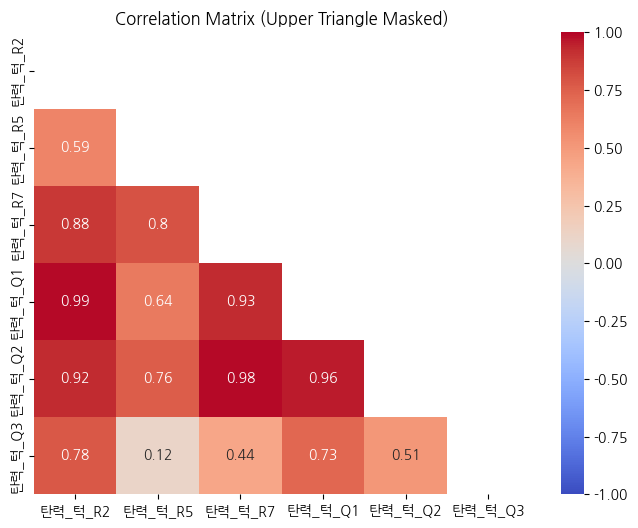

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관 행렬 계산
corr_matrix = elasticity_scaled_df[features].corr()

# 상삼각형 마스크 생성 (겹치는 값 제거용)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Upper Triangle Masked)")
plt.show()

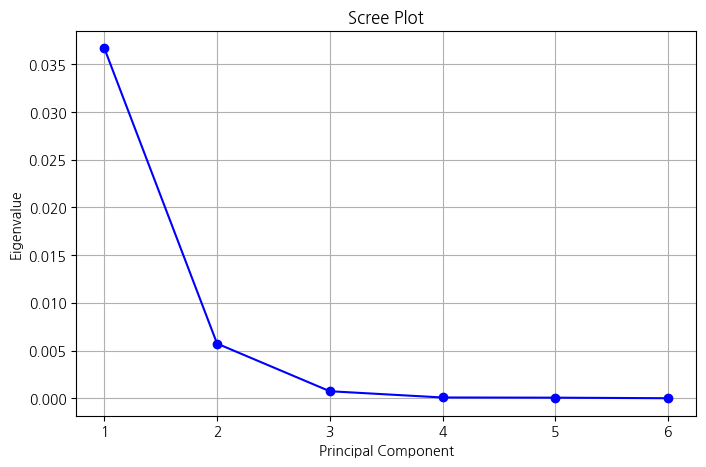

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

X = elasticity[features]

# PCA 수행
pca = PCA()
pca.fit(X)

# 고유값 (eigenvalues) 확인
explained_variance = pca.explained_variance_

# 스크리 플롯 그리기
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


In [72]:
# PCA 적용
pca = PCA(n_components=2)  # 2개의 주성분으로 변환
principal_components = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.84706645, 0.13234971])

In [73]:
# 결과
pca_components = pca.components_
print('printcipalComponents:\n', pca_components)

printcipalComponents:
 [[-0.53129814 -0.43293852 -0.35049733 -0.49176077 -0.39555387 -0.09563803]
 [-0.40344206  0.82366586  0.0773178  -0.28203302 -0.01211091 -0.27044725]]


In [74]:
loadings = pca.components_

# 로딩값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=x.columns)

loading_df.sort_values(by='PC1', ascending=False)

,PC1,PC2
탄력_턱_Q3,-0.095638,-0.270447
탄력_턱_R7,-0.350497,0.077318
탄력_턱_Q2,-0.395554,-0.012111
탄력_턱_R5,-0.432939,0.823666
탄력_턱_Q1,-0.491761,-0.282033
탄력_턱_R2,-0.531298,-0.403442


In [75]:
# 설명력 확인
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.84706645 0.13234971]


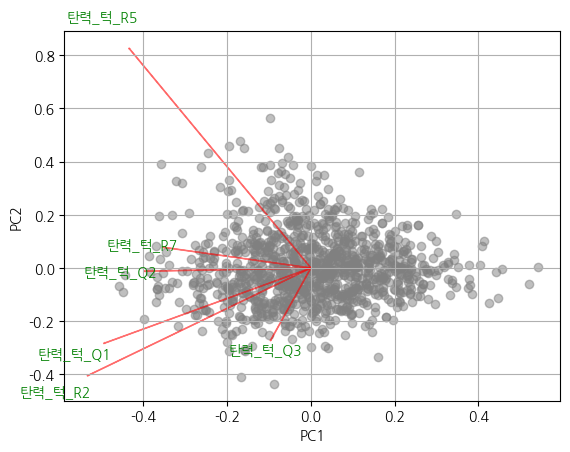

In [76]:
# Biplot 생성
def biplot(scores, coeff, labels=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Biplot 호출
biplot(principal_components, pca.components_.T, labels=x.columns)

상관관계

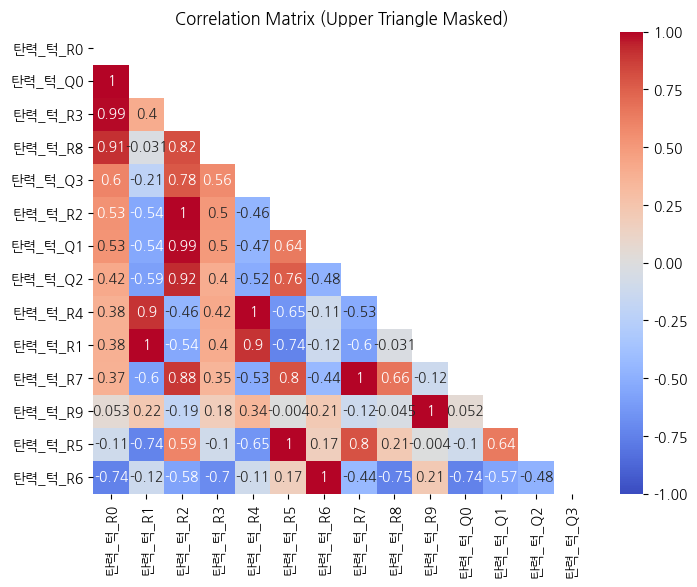

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관 행렬 계산
corr_matrix = elasticity_scaled_df.corr().sort_values('탄력_턱_R0', ascending=False)

# 상삼각형 마스크 생성 (겹치는 값 제거용)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Upper Triangle Masked)")
plt.show()


In [78]:
pca.explained_variance_ratio_

array([0.84706645, 0.13234971])

In [79]:
sum(pca.explained_variance_ratio_)

0.9794161534166419

- 탄력 턱

- pca1 >> Q1  피부가 초기 변형에서 얼마나 빨리 회복되는지를 나타내는 값
- Q1과 상관관계가 높은 컬럼 R3, R8

- R3 >> 피부의 임의 회복도 - 피부의 일부분 회복율
- R8 >> 피부의 비탄성 영역 - 피부의 비탄성 부분을 나타낸 값

## 탄력_왼쪽볼 (R0 ~ R9) / (Q0 ~ Q3)

- (R0 ~ R5, R7 ~ R9) (0-1) / R6 (0-2)
- Q0 (0-100) / Q1 ~ Q3 (0-1)

In [16]:
df.filter(regex='탄력_왼쪽볼')

,탄력_왼쪽볼_R0,탄력_왼쪽볼_R1,탄력_왼쪽볼_R2,탄력_왼쪽볼_R3,탄력_왼쪽볼_R4,탄력_왼쪽볼_R5,탄력_왼쪽볼_R6,탄력_왼쪽볼_R7,탄력_왼쪽볼_R8,탄력_왼쪽볼_R9,탄력_왼쪽볼_Q0,탄력_왼쪽볼_Q1,탄력_왼쪽볼_Q2,탄력_왼쪽볼_Q3
0,0.209,0.076,0.6364,0.258,0.121,0.7091,0.9000,0.3732,0.133,0.049,41.8,0.5618,0.4466,0.1152
1,0.246,0.087,0.6463,0.291,0.135,0.6594,0.7826,0.3699,0.159,0.045,49.2,0.5771,0.4529,0.1242
2,0.358,0.080,0.7765,0.402,0.137,0.6461,0.4733,0.4385,0.278,0.044,71.6,0.7072,0.5593,0.1479
3,0.288,0.121,0.5799,0.327,0.174,0.5057,0.6552,0.3056,0.167,0.039,57.6,0.5161,0.3833,0.1328
4,0.238,0.097,0.5924,0.267,0.132,0.6641,0.8594,0.3571,0.141,0.029,47.6,0.5348,0.4438,0.0909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.240,0.090,0.6400,0.270,0.130,0.6400,0.5700,0.4100,0.150,0.030,48.4,0.5700,0.4700,0.1000
1068,0.300,0.160,0.4600,0.350,0.210,0.4900,0.8000,0.2700,0.140,0.040,60.6,0.4100,0.3300,0.0800
1069,0.290,0.110,0.6200,0.320,0.180,0.5300,0.5800,0.3300,0.180,0.040,57.4,0.5400,0.4100,0.1300
1070,0.250,0.090,0.6300,0.280,0.130,0.5700,0.5500,0.3600,0.160,0.030,49.4,0.5700,0.4500,0.1200


In [17]:
from sklearn.preprocessing import MinMaxScaler

l_cheek_elasticity = df.filter(regex='탄력_왼쪽볼')
scaler = MinMaxScaler()
l_cheek_elasticity_scaled = scaler.fit_transform(l_cheek_elasticity)

l_cheek_elasticity_scaled_df = pd.DataFrame(l_cheek_elasticity_scaled, columns=l_cheek_elasticity.columns)
l_cheek_elasticity_scaled_df.head()

,탄력_왼쪽볼_R0,탄력_왼쪽볼_R1,탄력_왼쪽볼_R2,탄력_왼쪽볼_R3,탄력_왼쪽볼_R4,탄력_왼쪽볼_R5,탄력_왼쪽볼_R6,탄력_왼쪽볼_R7,탄력_왼쪽볼_R8,탄력_왼쪽볼_R9,탄력_왼쪽볼_Q0,탄력_왼쪽볼_Q1,탄력_왼쪽볼_Q2,탄력_왼쪽볼_Q3
0,0.240418,0.22500,0.624723,0.322368,0.255,0.681111,0.524048,0.517505,0.269481,0.596154,0.253425,0.580029,0.531008,0.464198
1,0.369338,0.29375,0.641603,0.430921,0.325,0.602222,0.426019,0.509854,0.353896,0.519231,0.380137,0.607606,0.544574,0.519753
2,0.759582,0.25000,0.863598,0.796053,0.335,0.581111,0.167752,0.668908,0.740260,0.500000,0.763699,0.842105,0.773686,0.666049
3,0.515679,0.50625,0.528389,0.549342,0.520,0.358254,0.319639,0.360770,0.379870,0.403846,0.523973,0.497657,0.394703,0.572840
4,0.341463,0.35625,0.549702,0.351974,0.310,0.609683,0.490147,0.480176,0.295455,0.211538,0.352740,0.531363,0.524978,0.314198


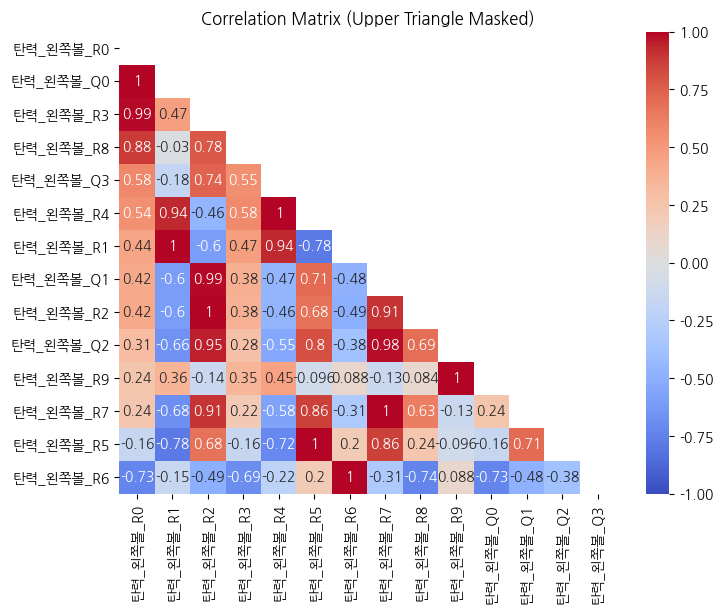

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관 행렬 계산
corr_matrix = l_cheek_elasticity_scaled_df.corr().sort_values('탄력_왼쪽볼_R0', ascending=False)

# 상삼각형 마스크 생성 (겹치는 값 제거용)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Upper Triangle Masked)")
plt.show()

In [19]:
#탄력_턱 컬럼들간의 pca분석
from sklearn.decomposition import PCA

x = l_cheek_elasticity

pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# # 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca

,pc1,pc2,pc3,pc4
0,-8.866535,-0.185844,0.199635,0.017415
1,-1.465422,-0.151043,0.150759,0.019049
2,20.938296,-0.266180,0.087863,0.023731
3,6.935098,0.067347,0.071755,0.025684
4,-3.066718,-0.094703,0.211545,-0.014967
...,...,...,...,...
1067,-2.263204,-0.191010,-0.060529,-0.056567
1068,9.932406,0.264414,0.245651,-0.043451
1069,6.736220,-0.007197,0.005855,0.013590
1070,-1.262981,-0.126027,-0.094939,-0.006542


In [20]:
df_pca[df_pca['pc1'] >= 0.6]

,pc1,pc2,pc3,pc4
2,20.938296,-0.266180,0.087863,0.023731
3,6.935098,0.067347,0.071755,0.025684
6,4.735261,-0.056666,0.102778,0.025041
10,10.135011,0.039368,0.130972,0.019320
11,0.736729,-0.073747,-0.071375,0.020471
...,...,...,...,...
1060,2.736930,-0.182534,-0.015104,-0.004491
1062,0.735539,0.071751,-0.034267,0.011473
1063,5.336340,-0.098198,0.026782,-0.039678
1068,9.932406,0.264414,0.245651,-0.043451


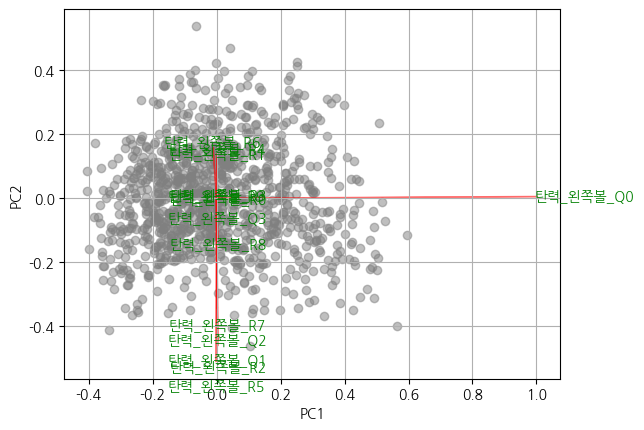

In [21]:
# Biplot 생성
def biplot(scores, coeff, labels=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Biplot 호출
biplot(principal_components, pca.components_.T, labels=x.columns)

In [22]:
loadings = pca.components_

# 로딩값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=x.columns)

loading_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
탄력_왼쪽볼_Q0,0.999891,0.005469,0.010612,-0.000700
탄력_왼쪽볼_R3,0.005162,0.009871,0.024836,-0.024434
탄력_왼쪽볼_R0,0.004969,0.000603,-0.000348,-0.000300
탄력_왼쪽볼_R8,0.003966,-0.122887,-0.011594,0.120749
탄력_왼쪽볼_R2,0.003548,-0.457433,-0.054591,0.530894
탄력_왼쪽볼_Q1,0.003358,-0.439584,-0.031348,0.292383
탄력_왼쪽볼_Q2,0.002087,-0.384979,0.011962,-0.146849
탄력_왼쪽볼_R4,0.001586,0.136081,0.019235,-0.093709
탄력_왼쪽볼_R7,0.001437,-0.341463,0.035402,-0.328062
탄력_왼쪽볼_Q3,0.001268,-0.054966,-0.042762,0.436068


- 탄력 왼쪽볼

- pca1 >> Q1  피부가 초기 변형에서 얼마나 빨리 회복되는지를 나타내는 값
- Q1과 상관관계가 높은 컬럼 R3, R8

- R3 >> 피부의 임의 회복도 - 피부의 일부분 회복율
- R8 >> 피부의 비탄성 영역 - 피부의 비탄성 부분을 나타낸 값

## 탄력_오른쪽볼 (R0 ~ R9) / (Q0 ~ Q3)

- (R0 ~ R5, R7 ~ R9) (0-1) / R6 (0-2)
- Q0 (0-100) / Q1 ~ Q3 (0-1)

In [23]:
df.filter(regex='탄력_오른쪽볼')

,탄력_오른쪽볼_R0,탄력_오른쪽볼_R1,탄력_오른쪽볼_R2,탄력_오른쪽볼_R3,탄력_오른쪽볼_R4,탄력_오른쪽볼_R5,탄력_오른쪽볼_R6,탄력_오른쪽볼_R7,탄력_오른쪽볼_R8,탄력_오른쪽볼_R9,탄력_오른쪽볼_Q0,탄력_오른쪽볼_Q1,탄력_오른쪽볼_Q2,탄력_오른쪽볼_Q3
0,0.230,0.080,0.6522,0.272,0.130,0.6457,0.8110,0.3565,0.150,0.042,46.0,0.5758,0.4465,0.1293
1,0.278,0.102,0.6331,0.315,0.144,0.6335,0.7267,0.3669,0.176,0.037,55.6,0.5627,0.4490,0.1136
2,0.303,0.087,0.7129,0.348,0.146,0.7318,0.6927,0.4323,0.216,0.045,60.6,0.6400,0.5259,0.1141
3,0.326,0.149,0.5429,0.369,0.221,0.4354,0.5598,0.2791,0.177,0.043,65.2,0.4803,0.3533,0.1270
4,0.212,0.079,0.6274,0.249,0.114,0.7168,0.8761,0.3821,0.133,0.037,42.4,0.5605,0.4624,0.0981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.240,0.090,0.6100,0.270,0.130,0.6000,0.5700,0.3800,0.150,0.030,47.6,0.5500,0.4500,0.1000
1068,0.300,0.120,0.6100,0.330,0.170,0.5200,0.4400,0.3600,0.180,0.030,59.6,0.5500,0.4400,0.1100
1069,0.290,0.100,0.6600,0.330,0.130,0.5400,0.5100,0.3500,0.190,0.040,58.6,0.5900,0.4400,0.1400
1070,0.220,0.080,0.6300,0.250,0.120,0.5900,0.6000,0.3700,0.140,0.030,43.2,0.5700,0.4600,0.1100


In [24]:
from sklearn.preprocessing import MinMaxScaler

r_cheek_elasticity = df.filter(regex='탄력_오른쪽볼')
scaler = MinMaxScaler()
r_cheek_elasticity_scaled = scaler.fit_transform(r_cheek_elasticity)

r_cheek_elasticity_scaled_df = pd.DataFrame(r_cheek_elasticity_scaled, columns=r_cheek_elasticity.columns)
r_cheek_elasticity_scaled_df.head()

,탄력_오른쪽볼_R0,탄력_오른쪽볼_R1,탄력_오른쪽볼_R2,탄력_오른쪽볼_R3,탄력_오른쪽볼_R4,탄력_오른쪽볼_R5,탄력_오른쪽볼_R6,탄력_오른쪽볼_R7,탄력_오른쪽볼_R8,탄력_오른쪽볼_R9,탄력_오른쪽볼_Q0,탄력_오른쪽볼_Q1,탄력_오른쪽볼_Q2,탄력_오른쪽볼_Q3
0,0.251397,0.200000,0.620963,0.308540,0.448276,0.691710,0.546971,0.434216,0.234375,0.533333,0.259669,0.574896,0.483962,0.589050
1,0.385475,0.318919,0.590722,0.426997,0.496552,0.670639,0.468872,0.455074,0.302083,0.450000,0.392265,0.553117,0.488679,0.485488
2,0.455307,0.237838,0.717068,0.517906,0.503448,0.840415,0.437373,0.586241,0.406250,0.583333,0.461326,0.681629,0.633774,0.488786
3,0.519553,0.572973,0.447910,0.575758,0.762069,0.328497,0.314249,0.278981,0.304688,0.550000,0.524862,0.416126,0.308113,0.573879
4,0.201117,0.194595,0.581697,0.245179,0.393103,0.814508,0.607282,0.485560,0.190104,0.450000,0.209945,0.549460,0.513962,0.383245


In [25]:
r_cheek_elasticity = df.filter(regex='탄력_오른쪽볼')

In [26]:
#탄력_턱 컬럼들간의 pca분석
from sklearn.decomposition import PCA

x = r_cheek_elasticity

pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# # 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca

,pc1,pc2,pc3,pc4
0,-4.870781,-0.165895,0.140823,0.042701
1,4.729626,-0.109884,0.151478,-0.003621
2,9.730550,-0.266138,0.202845,-0.022530
3,14.330392,0.170726,0.017246,0.003046
4,-8.471544,-0.204346,0.195810,-0.013468
...,...,...,...,...
1067,-3.268709,-0.154041,-0.080768,-0.047444
1068,8.732269,-0.056258,-0.116627,-0.042119
1069,7.731870,-0.106852,-0.058577,0.028481
1070,-7.668687,-0.188183,-0.100063,-0.008999


In [27]:
df_pca[df_pca['pc1'] >= 0.6]

,pc1,pc2,pc3,pc4
1,4.729626,-0.109884,0.151478,-0.003621
2,9.730550,-0.266138,0.202845,-0.022530
3,14.330392,0.170726,0.017246,0.003046
10,17.930952,-0.028982,0.123207,0.046711
18,7.130727,-0.093020,0.059884,0.058554
...,...,...,...,...
1063,7.332528,-0.230471,-0.057950,-0.034628
1064,3.931029,-0.229479,0.065758,-0.009385
1065,1.730592,-0.012496,-0.030795,-0.016969
1068,8.732269,-0.056258,-0.116627,-0.042119


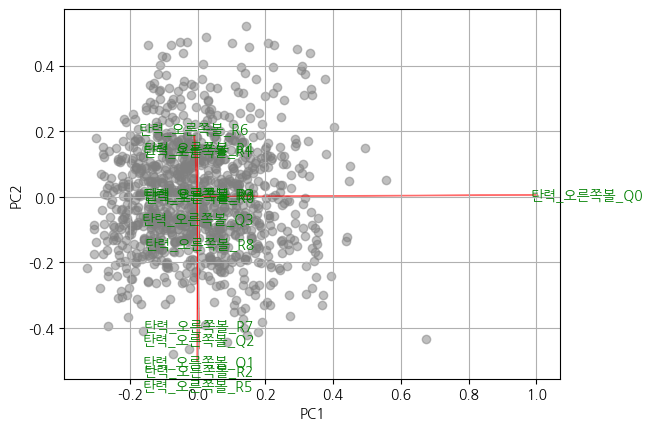

In [28]:
# Biplot 생성
def biplot(scores, coeff, labels=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Biplot 호출
biplot(principal_components, pca.components_.T, labels=x.columns)

In [29]:
loadings = pca.components_

# 로딩값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=x.columns)

loading_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
탄력_오른쪽볼_Q0,0.999903,0.005476,0.009426,-0.000451
탄력_오른쪽볼_R3,0.005164,0.009741,0.022786,-0.030369
탄력_오른쪽볼_R0,0.005000,0.000471,-0.002364,-0.002510
탄력_오른쪽볼_R8,0.003797,-0.123252,-0.008838,0.119385
탄력_오른쪽볼_R2,0.003323,-0.460538,-0.036084,0.532535
탄력_오른쪽볼_Q1,0.003128,-0.439936,-0.014791,0.286654
탄력_오른쪽볼_Q2,0.001973,-0.379471,0.022895,-0.140896
탄력_오른쪽볼_R4,0.001803,0.132274,0.018644,-0.117169
탄력_오른쪽볼_R7,0.001362,-0.339933,0.046718,-0.331520
탄력_오른쪽볼_R1,0.001156,0.122810,0.008092,-0.124248


- 탄력 오른쪽볼

- pca1 >> Q1  피부가 초기 변형에서 얼마나 빨리 회복되는지를 나타내는 값
- Q1과 상관관계가 높은 컬럼 R3, R8

- R3 >> 피부의 임의 회복도 - 피부의 일부분 회복율
- R8 >> 피부의 비탄성 영역 - 피부의 비탄성 부분을 나타낸 값

## 탄력_이마 (R0 ~ R9) / (Q0 ~ Q3)

- (R0 ~ R5, R7 ~ R9) (0-1) / R6 (0-2)
- Q0 (0-100) / Q1 ~ Q3 (0-1)

In [30]:
df.filter(regex='탄력_이마')

,탄력_이마_R0,탄력_이마_R1,탄력_이마_R2,탄력_이마_R3,탄력_이마_R4,탄력_이마_R5,탄력_이마_R6,탄력_이마_R7,탄력_이마_R8,탄력_이마_R9,탄력_이마_Q0,탄력_이마_Q1,탄력_이마_Q2,탄력_이마_Q3
0,0.167,0.058,0.6527,0.208,0.085,0.7647,0.9647,0.3892,0.109,0.041,33.4,0.5886,0.4777,0.1109
1,0.287,0.097,0.6620,0.329,0.135,0.5517,0.6494,0.3345,0.190,0.042,57.4,0.5792,0.4375,0.1417
2,0.171,0.073,0.5731,0.207,0.111,0.6129,0.8387,0.3333,0.098,0.036,34.2,0.5138,0.4206,0.0932
3,0.250,0.082,0.6720,0.285,0.109,0.5705,0.6026,0.3560,0.168,0.035,50.0,0.5991,0.4491,0.1500
4,0.198,0.087,0.5606,0.238,0.132,0.6837,1.0204,0.3384,0.111,0.040,39.6,0.5056,0.4170,0.0886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.200,0.070,0.6700,0.230,0.100,0.6400,0.7200,0.3700,0.140,0.030,40.2,0.5900,0.4500,0.1300
1068,0.180,0.060,0.6500,0.210,0.100,0.7000,0.7300,0.4000,0.110,0.040,35.2,0.5900,0.4800,0.1100
1069,0.240,0.070,0.7100,0.280,0.120,0.5900,0.6900,0.3500,0.170,0.040,48.6,0.6200,0.4500,0.1700
1070,0.210,0.070,0.6700,0.240,0.100,0.6200,0.5800,0.3900,0.140,0.030,42.4,0.6100,0.4800,0.1300


In [31]:
from sklearn.preprocessing import MinMaxScaler

forehead_elasticity = df.filter(regex='탄력_이마')
scaler = MinMaxScaler()
forehead_elasticity_scaled = scaler.fit_transform(forehead_elasticity)

forehead_elasticity_scaled_df = pd.DataFrame(forehead_elasticity_scaled, columns=forehead_elasticity.columns)
forehead_elasticity_scaled_df.head()

,탄력_이마_R0,탄력_이마_R1,탄력_이마_R2,탄력_이마_R3,탄력_이마_R4,탄력_이마_R5,탄력_이마_R6,탄력_이마_R7,탄력_이마_R8,탄력_이마_R9,탄력_이마_Q0,탄력_이마_Q1,탄력_이마_Q2,탄력_이마_Q3
0,0.203562,0.215517,0.518676,0.220339,0.224138,0.774122,0.725991,0.62300,0.164103,0.492958,0.204604,0.549310,0.542830,0.208529
1,0.508906,0.383621,0.532353,0.513317,0.396552,0.459870,0.433423,0.48625,0.371795,0.507042,0.511509,0.533103,0.466981,0.299118
2,0.213740,0.280172,0.401618,0.217918,0.313793,0.550162,0.609075,0.48325,0.135897,0.422535,0.214834,0.420345,0.435094,0.156471
3,0.414758,0.318966,0.547059,0.406780,0.306897,0.487607,0.389997,0.54000,0.315385,0.408451,0.416880,0.567414,0.488868,0.323529
4,0.282443,0.340517,0.383235,0.292978,0.386207,0.654618,0.777675,0.49600,0.169231,0.478873,0.283887,0.406207,0.428302,0.142941


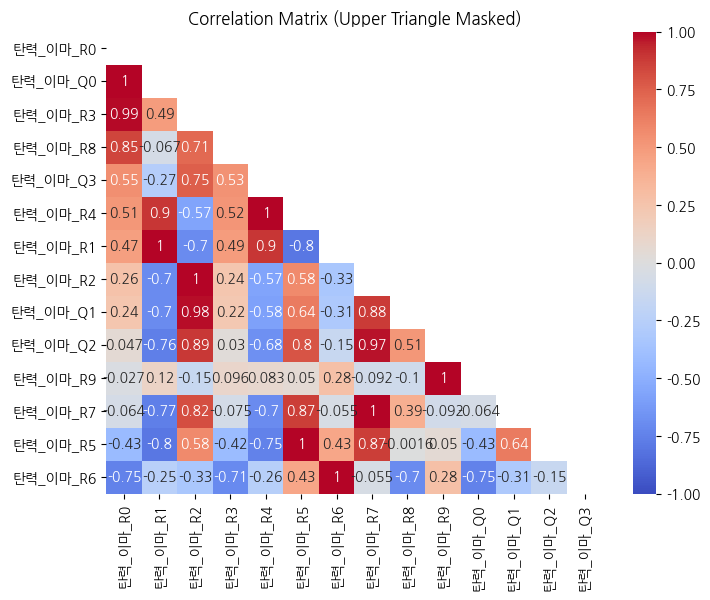

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관 행렬 계산
corr_matrix = forehead_elasticity_scaled_df.corr().sort_values('탄력_이마_R0', ascending=False)

# 상삼각형 마스크 생성 (겹치는 값 제거용)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Upper Triangle Masked)")
plt.show()

In [33]:
#탄력_턱 컬럼들간의 pca분석
from sklearn.decomposition import PCA

x = forehead_elasticity

pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# # 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca

,pc1,pc2,pc3,pc4
0,-16.148424,-0.210946,0.185730,-0.007475
1,7.855003,-0.077572,0.103114,0.017075
2,-15.346827,-0.027453,0.038070,-0.006483
3,0.455743,-0.129047,-0.025040,0.015572
4,-9.949327,-0.024347,0.297938,-0.019843
...,...,...,...,...
1067,-9.345486,-0.160523,-0.006785,0.011309
1068,-14.345713,-0.201153,-0.034025,-0.044134
1069,-0.945038,-0.160694,0.042684,0.065432
1070,-7.143984,-0.188358,-0.119759,-0.026259


In [34]:
pca.explained_variance_ratio_

array([9.99604091e-01, 2.73225925e-04, 1.00449612e-04, 1.63595408e-05])

In [35]:
df_pca[df_pca['pc1'] >= 0.6]

,pc1,pc2,pc3,pc4
1,7.855003,-0.077572,0.103114,0.017075
5,11.454556,-0.109381,0.174252,-0.044713
7,5.257634,-0.237256,-0.115150,0.104214
10,11.056705,-0.047921,-0.019530,0.007563
13,1.654293,-0.230956,0.116953,-0.013934
...,...,...,...,...
1044,17.059632,-0.310090,-0.160198,0.072543
1047,8.056837,-0.225482,-0.045715,-0.038683
1048,2.254823,-0.172682,0.087959,0.040540
1051,1.056560,-0.074592,-0.090365,0.017567


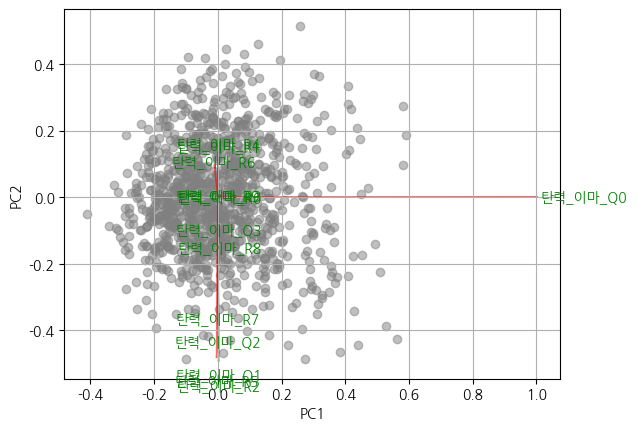

In [36]:
# Biplot 생성
def biplot(scores, coeff, labels=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Biplot 호출
biplot(principal_components, pca.components_.T, labels=x.columns)

In [37]:
loadings = pca.components_

# 로딩값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=x.columns)

loading_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
탄력_이마_Q0,0.999893,0.001222,0.011696,-0.001870
탄력_이마_R0,0.005002,-0.000072,-0.000235,-0.000238
탄력_이마_R3,0.004984,0.004420,0.024700,-0.005481
탄력_이마_R8,0.003716,-0.131996,-0.015718,0.154142
탄력_이마_R2,0.002251,-0.490371,-0.070035,0.506885
탄력_이마_Q1,0.001913,-0.464046,-0.046069,0.215588
탄력_이마_R4,0.001643,0.140098,0.030047,-0.100946
탄력_이마_Q3,0.001612,-0.086938,-0.040597,0.436322
탄력_이마_R1,0.001263,0.132833,0.014119,-0.152929
탄력_이마_Q2,0.000299,-0.378084,-0.005926,-0.218187


- Ra (평균 거칠기):
주름 표면의 평균 거칠기. 표면 높이의 절대값의 평균으로 정의됩니다.
- Rq (제곱 평균 거칠기):
주름 표면 높이의 RMS(Root Mean Square) 값으로, 표면 높이의 제곱 평균의 제곱근입니다.
- Rmax (최대 높이):
주름 표면에서 가장 높은 지점과 가장 낮은 지점 사이의 최대 거리입니다.
- R3z (3점 평균 거칠기):
표면의 가장 높은 3개의 피크와 가장 낮은 3개의 밸리의 평균 높이 차이입니다.
- Rt (전체 높이):
전체 프로파일 높이의 최대 값과 최소 값 사이의 차이입니다.
- Rz=Rtm (10점 평균 거칠기):
표면의 가장 높은 5개의 피크와 가장 낮은 5개의 밸리의 평균 높이 차이입니다.
- Rp (최대 피크 높이):
기준선 위에서 가장 높은 피크까지의 거리입니다.
- Rv (최대 밸리 깊이):
기준선 아래에서 가장 깊은 밸리까지의 거리입니다.

## 주름_눈가 (오/왼)

- (Ra, Rq, R3z) (0-100)
- (Rz=Rtm, Rp, Rv) (0-200)
- (Rmax) (0-300)
- (Rt) (0-350)

In [38]:
df.filter(regex='주름_왼쪽')

,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764
1,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486
2,14.234,17.888,106.800,46.069,112.22,83.785,52.243,59.979
3,17.478,21.618,133.210,54.118,139.96,93.392,73.288,66.673
4,15.936,20.052,137.100,51.184,142.55,91.870,68.735,73.816
...,...,...,...,...,...,...,...,...
1067,18.550,23.304,133.660,59.315,140.89,105.080,69.008,71.882
1068,13.630,16.948,98.893,44.723,106.36,78.948,51.545,54.816
1069,14.230,18.011,109.180,47.786,116.98,83.307,54.817,62.164
1070,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410


In [39]:
#minmax-scaler
from sklearn.preprocessing import MinMaxScaler

l_peroucular_wrinkle = df.filter(regex='주름_왼쪽')

scaler = MinMaxScaler()
l_peroucular_wrinkle_scaled = scaler.fit_transform(l_peroucular_wrinkle)

l_peroucular_wrinkle_scaled_df = pd.DataFrame(l_peroucular_wrinkle_scaled, columns=l_peroucular_wrinkle.columns)
l_peroucular_wrinkle_scaled_df.head()

,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,0.117349,0.122171,0.112206,0.126867,0.113669,0.129063,0.117029,0.126619
1,0.139294,0.142700,0.117003,0.136032,0.115211,0.145290,0.116056,0.130024
2,0.108484,0.109089,0.071251,0.107396,0.072930,0.116074,0.078135,0.085180
3,0.191361,0.186668,0.146208,0.172104,0.147970,0.164309,0.208536,0.116755
4,0.151966,0.154097,0.157249,0.148517,0.154976,0.156667,0.180324,0.150449


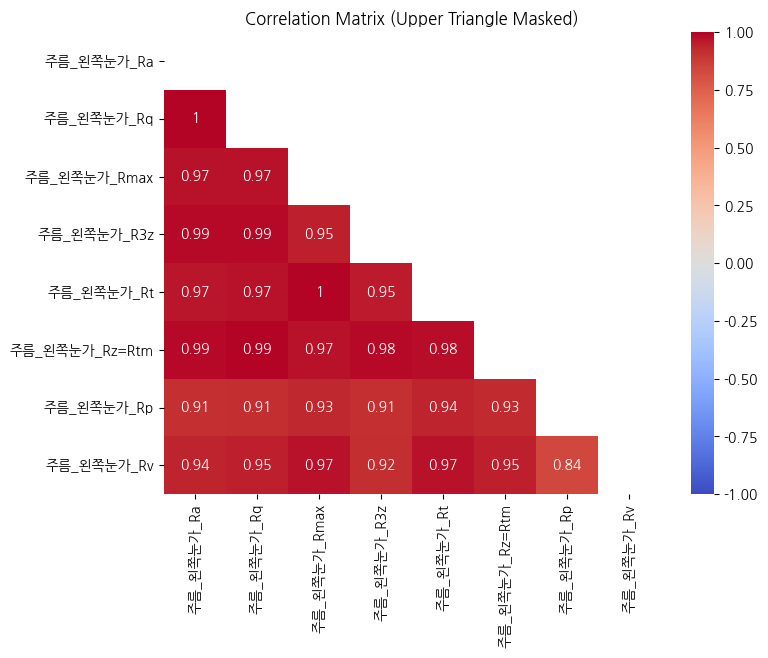

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관 행렬 계산
corr_matrix = l_peroucular_wrinkle_scaled_df.corr()

# 상삼각형 마스크 생성 (겹치는 값 제거용)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Upper Triangle Masked)")
plt.show()

In [41]:
#탄력_턱 컬럼들간의 pca분석
from sklearn.decomposition import PCA

x = l_peroucular_wrinkle

pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# # 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca

,pc1,pc2,pc3,pc4
0,-84.890365,4.972994,5.170728,1.542603
1,-81.805345,4.704784,2.840118,1.390038
2,-107.443049,3.026122,-1.779917,0.325926
3,-64.082712,-8.104916,9.153352,2.851768
4,-60.511625,1.100087,11.967741,2.383936
...,...,...,...,...
1067,-56.723434,-5.311538,-2.701077,0.164632
1068,-119.309776,0.716134,-1.688240,0.259913
1069,-101.877524,2.803220,0.332624,0.784684
1070,-124.941809,17.031383,3.346278,-4.176542


In [42]:
df_pca[df_pca['pc1'] >= 0.6]

,pc1,pc2,pc3,pc4
13,36.651432,4.367945,-0.149991,-1.559253
22,2.559761,8.282063,7.492250,-1.496319
44,32.882378,-7.415851,-7.101358,2.758386
47,30.566909,4.278498,3.951917,0.154848
55,14.529344,-8.074334,12.661493,-1.674077
...,...,...,...,...
1034,112.865544,-4.118226,-8.871875,-1.968131
1039,88.383710,4.471862,-11.851060,1.053563
1042,16.209448,10.700509,-3.343997,-5.082972
1050,78.740729,-10.276281,-8.569376,-1.749675


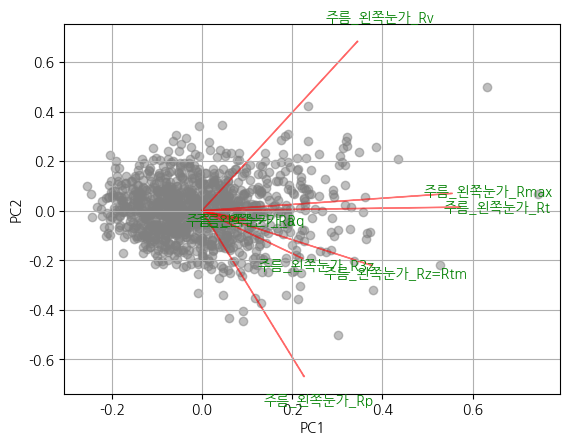

In [43]:
# Biplot 생성
def biplot(scores, coeff, labels=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Biplot 호출
biplot(principal_components, pca.components_.T, labels=x.columns)

In [44]:
loadings = pca.components_

# 로딩값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=x.columns)

loading_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
주름_왼쪽눈가_Rt,0.569373,0.014257,0.276382,-0.287306
주름_왼쪽눈가_Rmax,0.551284,0.069201,0.295622,0.518700
주름_왼쪽눈가_Rz=Rtm,0.374185,-0.219407,-0.619270,-0.486489
주름_왼쪽눈가_Rv,0.343776,0.680906,-0.065665,-0.156514
주름_왼쪽눈가_Rp,0.225596,-0.666656,0.342073,-0.130780
주름_왼쪽눈가_R3z,0.220862,-0.191068,-0.536304,0.601383
주름_왼쪽눈가_Rq,0.092336,-0.034304,-0.157451,0.045870
주름_왼쪽눈가_Ra,0.074200,-0.033487,-0.137790,0.079802


주름_오른쪽눈가

In [45]:
from sklearn.preprocessing import MinMaxScaler

x = df.filter(regex='주름_오른쪽')
scaler = MinMaxScaler()
r_peroucular_wrinkle_scaled = scaler.fit_transform(x)

r_peroucular_wrinkle_scaled_df = pd.DataFrame(r_peroucular_wrinkle_scaled, columns=x.columns)
r_peroucular_wrinkle_scaled_df.head()

,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,0.060822,0.057068,0.050257,0.083567,0.047414,0.055771,0.044698,0.049729
1,0.112712,0.108961,0.107565,0.135874,0.110545,0.129961,0.097713,0.118794
2,0.141662,0.135158,0.092793,0.182358,0.092616,0.157145,0.140566,0.064844
3,0.189979,0.178660,0.106242,0.204068,0.118992,0.183863,0.147892,0.102519
4,0.164658,0.152420,0.107910,0.190892,0.110493,0.161827,0.180026,0.069944


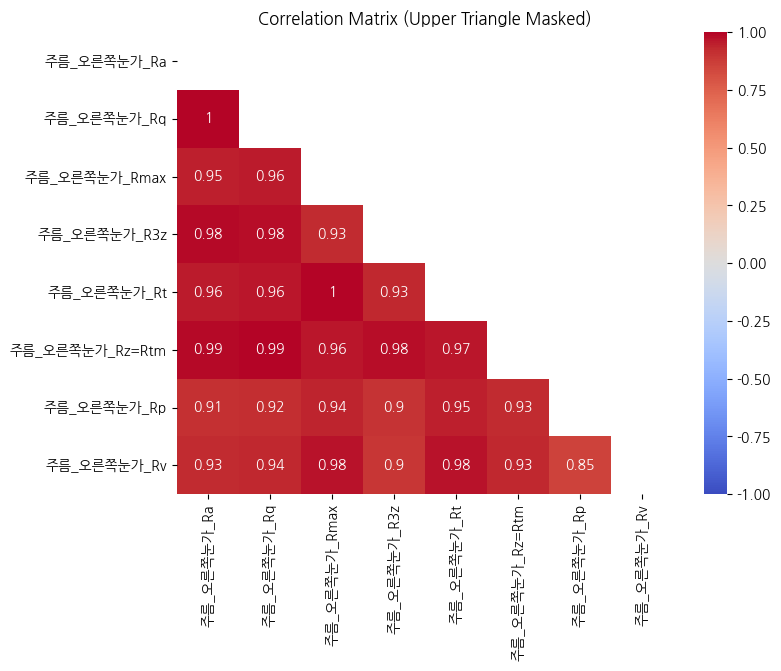

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관 행렬 계산
corr_matrix = r_peroucular_wrinkle_scaled_df.corr()

# 상삼각형 마스크 생성 (겹치는 값 제거용)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Upper Triangle Masked)")
plt.show()

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)

# # 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca

,pc1,pc2,pc3,pc4
0,-124.644823,7.613493,-1.545875,-2.664469
1,-84.683910,11.971392,-1.590028,-0.304876
2,-92.011524,-4.628024,0.888204,-1.323279
3,-77.381253,-1.384508,-2.124507,1.611569
4,-82.519173,-5.079747,5.855648,-1.475518
...,...,...,...,...
1067,-85.340000,-6.395028,4.893341,0.326563
1068,-98.128895,-2.154787,1.063084,-1.341598
1069,-87.273453,-0.960934,5.048672,0.310713
1070,-134.768013,8.245168,-4.452413,-0.460406


In [48]:
df_pca[df_pca['pc1'] >= 0.6]

,pc1,pc2,pc3,pc4
7,24.422517,2.313529,-6.049618,-0.949963
12,15.445517,4.296544,-3.144928,-1.878117
13,1.877638,4.154535,-6.922971,0.690245
28,31.536326,-0.689316,1.760402,-0.414232
32,16.993040,3.115922,-11.285801,0.568458
...,...,...,...,...
1031,18.655597,13.443360,0.449228,0.803225
1034,56.979823,-0.527045,-3.688982,-0.471217
1039,55.776760,-13.909731,-5.777672,2.952487
1050,20.691061,1.339252,-3.679691,3.973844


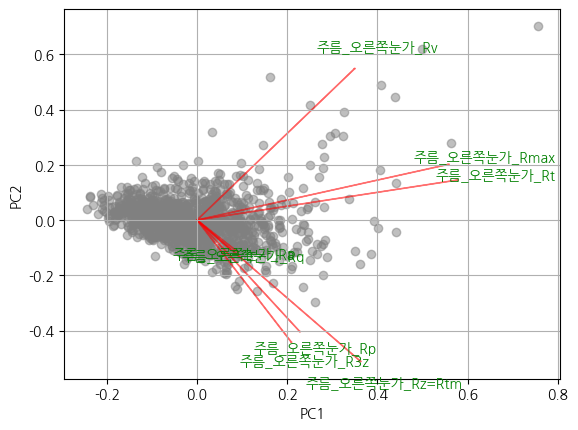

In [49]:
# Biplot 생성
def biplot(scores, coeff, labels=None):
    xs = scores[:,0]
    ys = scores[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Biplot 호출
biplot(principal_components, pca.components_.T, labels=x.columns)

In [50]:
loadings = pca.components_

# 로딩값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=x.columns)

loading_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
주름_오른쪽눈가_Rt,0.575388,0.144331,0.218115,0.317134
주름_오른쪽눈가_Rmax,0.555683,0.200896,0.218982,-0.565388
주름_오른쪽눈가_Rz=Rtm,0.361461,-0.510094,-0.413497,0.443959
주름_오른쪽눈가_Rv,0.348446,0.546646,-0.410966,0.174321
주름_오른쪽눈가_Rp,0.226942,-0.402313,0.629068,0.142820
주름_오른쪽눈가_R3z,0.208323,-0.440509,-0.376911,-0.575357
주름_오른쪽눈가_Rq,0.089643,-0.114635,-0.121905,0.000168
주름_오른쪽눈가_Ra,0.071697,-0.103667,-0.109315,-0.029020


## 스팟개수(여드름) (0-300)

In [51]:
df.filter(regex='스팟')

,스팟개수_정면
0,147
1,158
2,32
3,291
4,90
...,...
1067,83
1068,47
1069,66
1070,44


##모공개수 (오/왼)

- 볼 (0-3000)

In [52]:
df.filter(regex='모공')

,모공개수_오른쪽볼,모공개수_왼쪽볼
0,608,629
1,691,631
2,417,312
3,924,897
4,301,382
...,...,...
1067,429,332
1068,220,187
1069,678,616
1070,365,271


In [53]:
df[['모공개수_오른쪽볼', '모공개수_왼쪽볼', '탄력_이마_R3']]

,모공개수_오른쪽볼,모공개수_왼쪽볼,탄력_이마_R3
0,608,629,0.208
1,691,631,0.329
2,417,312,0.207
3,924,897,0.285
4,301,382,0.238
...,...,...,...
1067,429,332,0.230
1068,220,187,0.210
1069,678,616,0.280
1070,365,271,0.240


In [54]:
df[['모공개수_오른쪽볼', '모공개수_왼쪽볼', '탄력_이마_Q0']].corr()

,모공개수_오른쪽볼,모공개수_왼쪽볼,탄력_이마_Q0
모공개수_오른쪽볼,1.000000,0.965253,0.051537
모공개수_왼쪽볼,0.965253,1.000000,0.049390
탄력_이마_Q0,0.051537,0.049390,1.000000


In [55]:
df[df['모공개수_오른쪽볼'] > 1000][['탄력_이마_Q0','모공개수_오른쪽볼']]

,탄력_이마_Q0,모공개수_오른쪽볼
7,54.8,1018
8,42.8,1258
12,48.4,1498
24,59.2,1178
32,73.0,1429
...,...,...
1051,50.6,1435
1053,47.2,1586
1054,45.2,1041
1064,44.0,1117
